<a href="https://colab.research.google.com/github/jonisSweden1/Sci-fi-ML/blob/main/Machine_Learning_Workshop_1_MAGIC_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![virtual-neural-networks-artificial-intelligence-machine-learning-banner-wallpaper-made-with-generative-ai_155027-3423[1].jpg](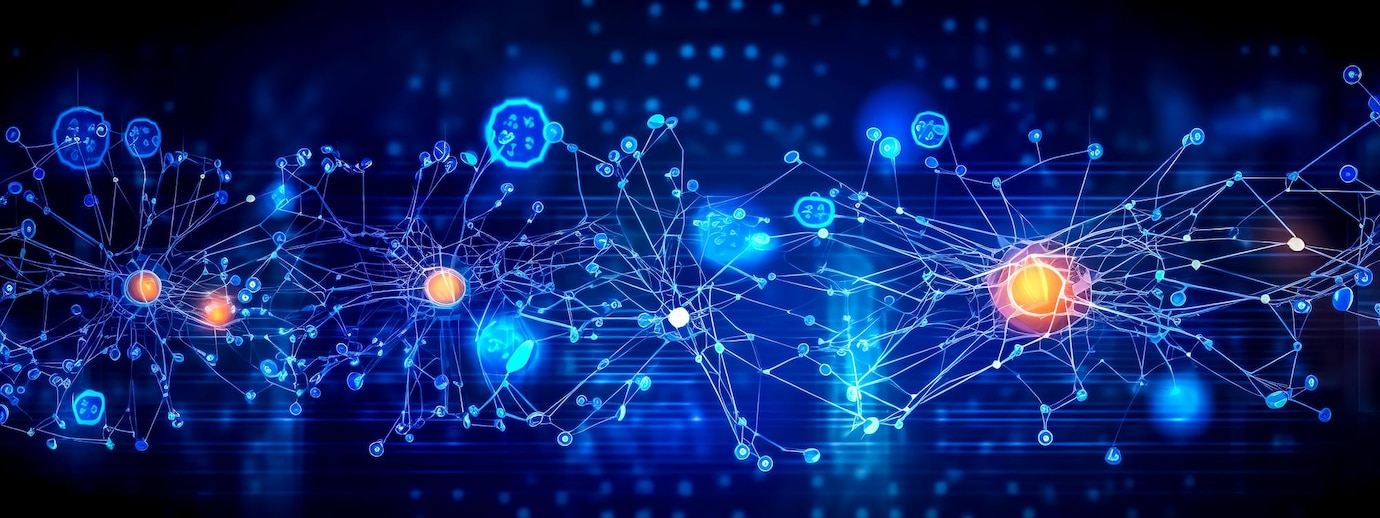)

# **Workshop 1 - Introduction to Machine Learning for Beginners**



This document follows the following general steps performed for ML Model  Implementation presented below. However, this document will teach you the basics for machine learning by introducing several fundamental and traditional machine learning models.

* Step 1: Loading and Understanding
* Step 2: Data preparation
* Step 3: Data Cleaning
* Step 4: Exploratory data analysis
* Step 5: Feature engineering and selection
* Step 6: ML Model assumption and checks
* Step 7: Data preparation for modeling
* Step 8: Model Building
* Step 9: Model Validation & Evaluation
* Step 10: Predictions

However, some deviations are done but in general it follows these overarching steps.

## **Getting Started with Machine Learning: Building Your First Model**

This walkthrough document is based upon the **Machine Learning for Everybody - Full Course** by Kylie Ying. Much thanks for making an excellent course for machine learning beginners!

### **Step 1 - Upload your data set to the CoLab document.**

Upload the magic04.data file to CoLab in order to begin working with the dataset.

* To do so, upload it into your files folder here in CoLab.
* The file can be found here: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
* Download the magic04.data file from the zip.



#### **Information regarding the used Dataset**
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz


#### **Background regarding the used Dataset**
The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

### **Step 2 - Import required libraries**

Import the following libraries:
* numpy as np
* pandas as pd
* matplotlib.pyplot as plt

In [ ]:
# Import the libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Step 3 - Loading and understanding the dataset**

Inspect your data set and learn about its different attributes (Note that each time you open this document the file has been erased due to security policy).

* Begin with reading the data set with the *pd.read_csv()* function into a dataframe. Name your data frame as *df*. The dataset file to read is named *magic04.data*.
* Check your *df* by executing *df.head()*.
* Notice that you do not recieve the labels for the columns when you print the dataframe. Add the columns to the data set: "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class".
* With the following function changes you can add the columns: *pd.read_csv("magic04.data", names=cols)*. If you store the columns in an *array* named *cols*.
* Check that your dataframe recieved the column names.

In [ ]:
# Load and understand your data set here

### **Questions**

What type of machine learning task is this workshop? Reason regarding the options provided below if the concepts apply or not within the workshop. Try to write elaborate answers for each option.

* Regression
* Clustering
* Classification
* Binary classification
    
    
    
    


In [ ]:
# Write your answer here to each bullet point.

#    Regression:
#    Clustering:
#    Classification:
#    Binary classification

### **Questions**

Answer the questions below.

* What does each row within the dataframe represent?
* In the dataframe each attribute/column is considered what?

In [ ]:
# Write your answer here to each bullet point.

### **Step 4 - Loading and understanding individual attributes**

Inspect the class attribute in the dataset by using the function *df["attribute"].unique()*. Notice that the datatype is of object.

* g = gamma
* h = hadron

However, our computer prefers the class value to be a numeric value for performance reasons.

In [ ]:
# Check the class attribute.

### **Step 5 - Data preparation**

Notice that the attribute class contains letter values. This is not optimal for the algorithm to work with. So let's transform so that the values of the class attribute is a numerical value. In other words, set the class attributes to either 0 and 1 depending on class label. Lets decide and declare that 'g' equals 1 and h = 0.

* Transform the class values to numerical values between 0 and 1.
* To do so we can use the following line of code: *df["class"] = (df["class"] == "g").astype(int)*

In [ ]:
# Write your code here to transform the class values to numerical values between 0 and 1

### **Question**

What type of machine learning task is this workshop? Reason regarding the options provided below if the concepts apply or not within the workshop. Try to write elaborate answers for each option.

* Unsupervised  learning
* Supervised  learning
* Semisupervised  learning
* Reinforcement learning
* Online learning
* Batch learning


In [ ]:
# Write your answer here to each bullet point.

#    Unsupervised learning:
#    Supervised learning:
#    Semisupervised learning:
#    Reinforcement learning:
#    Online learning:
#    Batch learning:


### **Step 6 - Exploratory data analysis**

Let's have a closer look at the distributions of the attributes. In order to do so, you have been provided with code below. Try to identifiy what the codes does below.

```
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
```



In [ ]:
# Execute the code and see if there are any diagrams that would be better than others make decisions upon.

### **Questions**

Consider which diagrams above could be used for deciding the class. We will still use all features of an instance. However, some features may seem more obvious than others. Yet, when training a machine learning model several features may work togheter in deciding the class.

### **Step 7 - Splitting the dataset into train, validation and test datasets**

In order to train our model, we need to split our dataset into three different datasets:

* Our training dataset - used to train our model.

* Our validation dataset - used to measure the performance of our model during training, helping to fine-tune hyperparameters and prevent overfitting.

* Test dataset - used to evaluate the final performance of the trained model on unseen data, giving an unbiased estimate of how well the model generalizes to new data.

The following code can be used to split the dataset into three different dataframes: `train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])`


In [ ]:
# Split the dataset into training, validation and test datasets.


### **Step 8 - Scaling the values for better performance**

Scaling the values in machine learning is important because many algorithms rely on the distance or magnitude of the data, such as gradient-based methods (e.g., logistic regression, neural networks) or distance-based models (e.g., k-nearest neighbors, support vector machines). If features are on different scales, the algorithm may give more importance to features with larger ranges, leading to suboptimal performance.

By scaling the values (e.g., standardizing or normalizing), we ensure that each feature contributes equally, helping the algorithm converge faster and perform better.


* Import StandardScaler from sklearn.preprocessing at the top of this document: *from sklearning.preprocessing import StandardScaler*

### **Step 9 - Class imbalance and oversampling**

Class imbalance occurs when the target variable in a dataset has disproportionate representation across its different classes. For example, in a binary classification problem, one class might appear much more frequently than the other. This can lead to biased models that perform well for the majority class but poorly for the minority class, as the model may simply ignore the less frequent class.

Oversampling is a technique used to address class imbalance by increasing the number of instances of the minority class. In this context, RandomOverSampler generates synthetic copies of the minority class to balance the dataset. This helps prevent the model from being biased toward the majority class and improves its performance, especially in detecting the minority class.

* Inspect the scale_dataset function for oversampling logic.
* Import RandomOverSampler from from imblearn.over_sampling
* Copy paste this function in the code block below:


```
def scale_dataset(dataframe, oversample=False):
  # Separate features (X) and target (y)
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Scale features
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Apply oversampling if required
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # Combine scaled features and target back into one array
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y
```



In [ ]:
# Copy paste the function here

### **Questions**

In your own words, describe the issue mentioned above and provide an example of the issue.

In [ ]:
# Write your answer here

### **Step 10 - Scaling the datasets**

Copy paste the following code into the code block below in order to scale your datasets. Notice that we only use *oversample=True* on the training part and not on the validation and test sets.

```
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
```



In [ ]:
# Copy paste the code above to here

## **Working with the K-Nearest-Neighbour Model**

We are almost ready to begin building our first model. However, before we dwelve into building the K-Nearest-Neighbour Model. It can be good to check the theoretical walkthrough for the algorithm in order to get a better feel for how it works.

[Here is the video link with timestamp for KNN.](https://youtu.be/i_LwzRVP7bg?t=2687)

### **Step 11 - Training our K-Nearest-Neighbour Model**

Now that we have our scaled training, validation, and test datasets we can finally start building models. We will begin with K-Nearest Neighbour is a simple, instance-based machine learning algorithm used for both classification and regression tasks. It works by finding the "k" closest data points (neighbors) to a query point based on a chosen distance metric (e.g., Euclidean distance). In classification, the class label is predicted based on the majority class among the neighbors, while in regression, the prediction is the average of the neighbors' values. KNN is non-parametric, meaning it makes no assumptions about the underlying data distribution, and its performance depends heavily on the value of k and the scaling of features.


* Import the KNeighborsClassifier from sklearn.neighbors
* Call *KNeighborsClassifier()*
* *KNeighborsClassifier()* can take a parameter of *n_neighbors=n*. Which decides how many instances to compare to - **set *n* to 1**. *KNeighborsClassifier()* returns an object that we store in a *knn_model variable*.
* *knn_model.fit(X, y)* : Fit the k-nearest neighbors classifier from the training dataset, i.e., your X_train and y_train.



In [ ]:
# Write your code here

### **Question**

What does the following concepts mean?

* Instance-based model
* Distance metric
* Euclidean distance
* Parametric model


### **Step 12 - Making predictions on our K-Nearest-Neighbour Model**

As we now have trained our KNN model we can make predictions based on it. In order to make predictions our model we use the *knn_model.predict()* function.

* Use the *.predict()* to make predictions by passing *X_test* vector to the predict function.
* *.predict()* returns an vector of predictions.
* Assign the return vector of *predict()* to a new variable called *y_pred*. Print *y_pred* and compare it to *y_test* by also printing *y_test*. *y_test* contains the truth values.

In [ ]:
# Write your code here for the above steps.

### **Step 13 - Evaluating the K-Nearest-Neighbour Model**

Let us evaluate how well this model now works by using the classification report library.

* Import classification_report from sklearn.metrics.
* Use the *classification_report()* by passing in *y_test* and *y_pred*. In other words, *classification_report(y_test, y_pred)*.
* print the classification_report.




In [ ]:
# write your code here for the above steps.

### **Questions**

What does the following concepts mean?

* Accuracy
* True positives
* False positives
* True negatives
* False negatives
* Low accuracy vs. High accuracy

### **Step 14 - Evaluate different settings for the K-Nearest-Neighbour Model**

In this last step evaluate different settings for the KNN model. What setting for *n_neighbours* works best?

* Set *n_neighbours* to 3.
* Set *n_neighbours* to 5.
* Set *n_neighbours* to 7.

* Why can we not set *n_neighbours* to an even number?


### **Summary**

Congratulations! You have completed the first chapter in this Colab document. In this chapter you have learnt several of the fundamental step in conducting efficient machine learning by building your very first K-Nearest-Neighbour Model.

In case you want to go through this workshop again, you may go to this video tutorial for a complete walkthrough: https://www.youtube.com/watch?v=i_LwzRVP7bg. Notice that the video also contains theoretical walkthroughs of how the model works - which may be good for our understanding of the models.

## **Working with the Naive Bayes Model**

In this chapter we will have a look at Naive Bayes. Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It assumes that the features in a dataset are independent of each other, which is often not true in reality but works well in practice for many applications. The algorithm calculates the probability of a class given a set of features and selects the class with the highest probability. Naive Bayes is popular for tasks like text classification, spam detection, and sentiment analysis due to its simplicity, efficiency, and ability to handle large datasets with many features.

I recommend you watch the theoretical walkthrough for the Naive Bayes in order to understand it better. [Here is the video link with timestamp for Naive Bayes.](https://youtu.be/i_LwzRVP7bg?t=3514)


### **Training, Predicting and Evaluating with Naive Bayes Model**

Let us get started with building our Naive Bayes classifier.

* Import *GaussianNB* from *sklearn.naive_bayes*.
* Create a new GaussianNB model by *nb_model = GaussianDB()*.
* Much similar to when we trained our KNN model we can train our Naive Bayes model by using the function *fit(X_train, y_train)* on our model object, i.e., our *nb_model*. Remember that the *fit()* function returns an *y_pred* vector with predictions.
* Use the *classification_report()* to evaluate how well the Naive Bayes model is performing.  
* Compare the K-Nearest-Neighbour classification report with our new Naive Bayes report. Which model performed better?

In [ ]:
# Write your code here

### **Summary**

What?! Already Summary?! That went quickly now did it not! As we can notice we already setup much of the prerequisites code logic for using the Naive Bayes Model. We already had the training, validation and test datasets so much was just plugging it in the model for learning and then using the model for predicting. On top of that, we also managed to evaluate the models performance.

In case you want to go through this part again, you may go to this video tutorial for a complete walkthrough: https://www.youtube.com/watch?v=i_LwzRVP7bg. Notice that the video also contains theoretical walkthroughs of how the model works.

## **Working with the Logistic Regression Model**

Logistic regression is a statistical method used for binary classification, predicting the probability of one of two possible outcomes (e.g., 0 or 1). It models the relationship between a dependent variable and one or more independent variables by using the sigmoid function, also known as the logistic function. The sigmoid function maps any real-valued input into a probability value between 0 and 1, producing an S-shaped curve. This allows logistic regression to output probabilities, which are then converted into class labels. It's widely used in fields like machine learning for tasks such as spam detection or customer churn prediction.

[See here for an illustration.](https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png)

I recommend you watch the theoretical walkthrough for the Logistic Model in order to understand it better. [Here is the video link with timestamp for Logistic Regression.](https://youtu.be/i_LwzRVP7bg?t=4761)



### **Training, Predicting and Evaluating with Logistic Regression**

Let us get started with building our Naive Bayes classifier.

* Import *LogisticRegression* from *sklearn.linear_model*.
* Create a new LogisticRegression model by *lg_model = LogisticRegression()*.
* Much similar to when we trained our previous models we can train our Logistic Model model by using the function *fit(X_train, y_train)* on our model object, i.e., our *lg_model*. Remember that the *fit()* function returns an *y_pred* vector with predictions.
* Use the *classification_report()* to evaluate how well the Logistic regression model is performing.  
* Compare the new classification report to the previous models. Which model performed better?

In [ ]:
# Write your code here

What?! Again?! Already completed? This tutorial must be awesome because you just completed your third machine learning model - The Logistic Regression Model. Well done!

In case you want to go through this part again, you may go to this video tutorial for a complete walkthrough: https://www.youtube.com/watch?v=i_LwzRVP7bg. Notice that the video also contains theoretical walkthroughs of how the model works.

## **Working with Support Vector Machines**

Support Vector Machines (SVM) are supervised learning algorithms used for classification and regression tasks. The main idea behind SVM is to find the optimal hyperplane that best separates data into different classes. In the case of classification, SVM aims to maximize the margin between the nearest data points of each class (support vectors) and the separating hyperplane. For non-linearly separable data, SVM can use a kernel trick to project the data into a higher-dimensional space where a linear separation becomes possible. SVMs are effective in high-dimensional spaces and are used in tasks like image recognition and text classification.

[See here for an illustration.](https://vitalflux.com/wp-content/uploads/2022/08/support-vector-machine-1.png)

I recommend you watch the theoretical walkthrough for the Support Vector Machine Model in order to understand it better. [Here is the video link with timestamp for SVM.](https://youtu.be/i_LwzRVP7bg?t=5353)

**Training, Predicting and Evaluating with Support Vector Machines**

Let us get started with building our Support Vector Machines classifier.

* Import *SVC* (stands for Support Vector Classifier) from *sklearn.svm*.
* Create a new SVC model by *svm_model = SVC()*.
* Much similar to when we trained our previous models we can train our SVM model by using the function *fit(X_train, y_train)* on our model object, i.e., our *svm_model*. Remember that the *fit()* function returns an *y_pred* vector with predictions.
* Use the *classification_report()* to evaluate how well the Logistic regression model is performing.  
* Compare the new classification report to the previous models. Which model performed better?

In [ ]:
# Write your code here

## **Working with Neural Networks**

A neural network is a computational architecture composed of layers of interconnected nodes (neurons) that process input data through a series of transformations. Each neuron in a given layer computes a weighted sum of its inputs, applies an activation function (such as ReLU, sigmoid, or tanh), and passes the output to the next layer. The network typically consists of an input layer, one or more hidden layers, and an output layer. During training, the network minimizes a loss function (e.g., mean squared error or cross-entropy) using optimization techniques like gradient descent, coupled with backpropagation to adjust the weights and biases of the connections. This allows the network to iteratively improve its performance on tasks such as classification, regression, and pattern recognition, particularly in complex, high-dimensional datasets. Neural networks are the foundational architecture for deep learning models.


[See here for an illustration.](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png)

I recommend you watch the theoretical walkthrough for the Neural Network in order to understand it better. [Here is the video link with timestamp for Neural Networks.](https://youtu.be/i_LwzRVP7bg?t=5984)

### **Question**

What statements are true or false?

1. The network becomes a linear model without activation functions in a neural network.
2. The process of training a neural network involves adjusting the weights and biases.
3. A neural network is inspired by the structure of the human brain.
4. In a neural network, data only flows backward through the layers.
5. Each connection between neurons has a weight that determines the strength of the signal.
6. The input layer of a neural network is responsible for making predictions.
7. Neural networks require large amounts of data to train effectively.
8. An activation function is applied to each neuron to introduce non-linearity.
9. Training a neural network always leads to 100% accuracy.
10. Neural networks can only be used for image classification tasks.
11. Backpropagation is a process used to update weights in a neural network.
12. All neurons in a neural network are connected to each other.

In [ ]:
# Write your answers here

# 1. (TRUE) The network becomes a linear model without activation functions in a neural network
# 2. (TRUE) The process of training a neural network involves adjusting the weights and biases.
# 3. (TRUE) A neural network is inspired by the structure of the human brain.
# 4. (FALSE) In a neural network, data only flows backward through the layers.
# 5. (TRUE) Each connection between neurons has a weight that determines the strength of the signal.
# 6. (FALSE) The input layer of a neural network is responsible for making predictions.
# 7. (TRUE) Neural networks require large amounts of data to train effectively.
# 8. (TRUE) An activation function is applied to each neuron to introduce non-linearity.
# 9. (FALSE) Training a neural network always leads to 100% accuracy.
# 10. (FALSE) Neural networks can only be used for image classification tasks.
# 11. (TRUE) Backpropagation is a process used to update weights in a neural network.
# 12. (FALSE) All neurons in a neural network are connected to each other.

### **Step 1 - Training, Predicting and Evaluating with Neural Networks**

Let us get started with building our Neural Network classifier. I have already completed these steps for you below. However, read through what is happening below.

* Import *tensorflow* and call it *tf*.
* Set up the neural network
* Compile the network

The following below code creates a sequential **three layered** neural network where the first layer is the input layer consisting of 10 inputs (matching our dataset). Then we have a hidden layer consisting of 32 relu activation functions for each node. Finally the last layer, called the output layer, provides us with the prediction. Which in this case contains a sigmoid function that forces the output to be between 0 and 1. Matching our binary classification problem.


**First, set up the neural network:**

```
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
```

**Secondly, compile the neural network:**

`nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binarycrossentropy', metrics=['accuracy'])`

* The *optimizer* parameter recieves an *Adam* optimizer with an *Learning Rate* of 0.001. Learning Rate is a hyperparameter that controls how much the weights of the neural network are updated during training. The *loss='binary_crossentropy'* refers to the binary cross-entropy loss function used in training neural networks for binary classification tasks, where the output is either 0 or 1 (e.g., true/false, yes/no). This loss function measures the difference between the predicted probabilities and the actual class labels and penelizes bad prediction during training.

**Lastly, inspect the plot_loss and plot_accuracy function below**
The provided code will plot the accuracy of the training.



```
def plot_loss(history):
  plt.plot(history.history['loss'], label="loss")
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()
```

In [ ]:
# Execute this code once, keep this as is - used to plot our accuracy -
def plot_loss(history):
  plt.plot(history.history['loss'], label="loss")
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


#### **Set up the Neural Network**
Below we will setup our neural network.[länktext](https://)

In [ ]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Step 2 - Train your neural network**

Execute this code below, where we traing our neural networks. Study the output we get from the here in the console.

* Execute the code below.

```
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)
```

* When completed or when you are bored at looking at the output from our training. You may adding the *verbose=0* to the *fit()* function. The parameter *verbose=0* will make so that there is no output in the window.

In [ ]:
# Execute the code above here

### **Step 3 - Plot the loss, loss value, accuracy and accuracy value**

Execute the code below and inspect how the loss and accuracy behave.

In [ ]:
plot_loss(history)
plot_accuracy(history)

### **Questions**

What does the following concepts mean?
* Loss function
* Loss value
* Epoch
* Learning rate
* Global minimum and maximum
* Local minimum and maximum
* Gradient descent
* Contour plot
* Batch size

In [ ]:
# Write your answers here
# Loss function:
# Loss value:
# Epoch:
# Learning rate:
# Global minimum and maximum:
# Local minimum and maximum:
# Gradient descent:
# Contour plot:

### **Step 4 - Try different settings for optimizing the Neural Network**

Go back to training your neural network and test different values for the training.

* Try setting the first layer's nodes to 64 and see what performance you recieve.
* Adjust the learning rate from 0.001 to 0.01 or 0.1.
* Try changing activation function from 'relu' to 'sigmoid' or go with only 'relu' activation functions.
* Adjust the epochs to a smaller och higher value.
* Try a different batch_size.

Set the values back when you are done testing things out:

```
  tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
```

In the video tutorial Kylie Ying sets the first layer to 64 nodes before she continues. You may do so if you wish.





### **Step 5 - Adding Dropout as a way to combat overfitting**

Overfitting occurs when a neural network performs well on the training data but fails to generalize to unseen data. This happens because the network becomes too complex and learns noise or irrelevant patterns in the training data.

Dropout is a technique used in neural networks to prevent overfitting. During training, it randomly "drops" (i.e., deactivates) a subset of neurons in each layer, forcing the network to learn more robust features rather than relying too heavily on certain neurons.

Your goal now is to update the code under **Set up the Neural Network** so that it includes dropout. In order to arrange so that dropout occurs the following code is used in between the layers.

```
tf.keras.layers.Dropout(rate)
```

To make this a bit easier, it can be a good thing to wrap the training around a function like *train_model(X_train, y_train, num_nodes, dropout_rate, learning_rate, batch_size, epochs)*

**Wrapping the model traning under a function:**

```
def train_model(X_train, y_train, num_nodes, dropout_rate, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
```

**In order to include the dropout the function can be updated like this:**

```
def train_model(X_train, y_train, num_nodes, dropout_rate, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history
```


* Update your code under **Set up the Neural Network**.








In [ ]:
# Paste the train_model function here

### **Step 6 - Preparing for testing our new function out with different settings**

Below is an updated function so that you can use to plot the history side by side.

```
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()
```

In [ ]:
# Paste the plot_history(history) function here and run it

### **Step 7 - Testing our new function out with different settings**
Code for testing different settings when training our neural neural network. Note that executing this code will take a lot of time to process, hence, i do not recommend you to actually run it. However, if done you recieve a lot of diagrams and a decent model to use. Instead of executing this code, completely, let assume we did and we can inspect the diagrams from [Kylie Ying's CoLab Notebook](https://colab.research.google.com/drive/16w3TDn_tAku17mum98EWTmjaLHAJcsk0?usp=sharing#scrollTo=xdIReNHW-cwM). Notice that she also created an classification report and evaluated her least loss model she could acquire by her last two code cells.

What this code does is basically called a **Grid Search**. Grid Search is a hyperparameter tuning technique used in machine learning to find the optimal combination of hyperparameters for a model. It systematically evaluates a predefined set of hyperparameter values for a given algorithm, by training and testing the model on each combination in the search space.

In Grid Search, a grid is created where each point represents a specific combination of hyperparameters. The model is trained and validated for each combination, and the performance (typically on a validation set) is compared to find the combination that produces the best results.

**Pros:**
* Simple and effective for small search spaces.
* Ensures that every possible combination is evaluated.

**Cons:**
* Computationally expensive for large search spaces.
* May require a lot of time and resources if there are many hyperparameters or large datasets.



```
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
```



In [ ]:
# Paste the above code here and execute it - NOTE THAT IT TAKES A LOT OF TIME! So do not recommend it.

## **Working with Linear Regression**

In this final task, explore how to setup linear regression by yourself. Feel free to follow Kylie Ying's tutorial by yourself. [Here is the timestamp for Linear regression.](https://youtu.be/i_LwzRVP7bg?t=7812)

## **Extra Questions**

Here are some extra questions you may consider answering.

* What does is mean to underfit (underfitting) a model?
* What is the bias variance tradeoff when training your models.
* What does supervised machine learning mean?
* Is having a small amount of data better or worse when training machine learning models?
* How does reinforcement learning differ from traditional supervised and unsupervised learning?
* What is Feature Scaling?
* What does Gradient Descent mean?
* What is Regularization and why do we do it? You did it with Dropout, perhaps without knowing what the concept is.
* What is the difference between Binary Classification and Multiclass Classification?
* What is the One vs All strategy?
* What is linear classification and what is non-linear classification?
* In this document, we have used binary classification. How can you create multi-classification in a Neural Network?
* What is forward propagation in the Neural Network algorithm?
* What is the backpropagation in the Neural Network algorithm?










# **Workshop 2 - Machine Learning Continuation**

This walkthrough document will continue with the **Machine Learning for Everybody - Full Course** by Kylie Ying before we go on to others things. Much thanks for making an excellent course for machine learning beginners!

### **Step 1 - Download and upload the a new data set to the CoLab document.**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

* Download the dataset below into CoLab.

[Download here](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

### **Step 2 - Setup your imports**

The following libraries will be used:
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
```



In [ ]:
# Write code here

### **Step 3 - Load Your Dataframe with Data and Columns**

In a similar way as we did previously, load the data into a dataframe with the attributes specified from the download page.

You will have to go into the dataset and make sure that it does not contain any illegal characters, i.e., characters that are problematic for our python reading should be removed within the file. In order to find out which characters, try to load the data into a dataframe with df.head().

In [ ]:
# Write code here

### **Step 4 - Remove Unecessary Columns at Load**

We can by using pd.read_csv().drop(['column1', 'column2'], axis=1) skip reading undesired columns. We skip the columns Date, Holiday and Season.

* Inspect your dataframe that you no longer have the undesired columns.

In [ ]:
# Write code here

### **Step 5 - Make Sure All Values are Numerical**

Remember that our computer works best on numerical values. Identify which values in your dataframe that are not numerical and turn them into numerical categorical values.  

In [ ]:
# Write code here

### **Step 6 - Limiting the Data**

The Hour columns indexes each data point into an hour. In order to make this dataset simpler, let us only work with the 12th hour of the day.

* Include only datapoints that are in the 12 th hour of the day.
* dataframe[dataframe["hour"] == 12] selects only the rows that are on the 12th hour.
* After you've included only the 12th hour you may actually drop the hour attribute on your dataframe in a similar fashion as above.

In [ ]:
# Write code here

### **Step 7 - Surveying the Data Distributions**

* Survey the data distribution of the attributes. Which attributes are better predictors to use?

```
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()
```





In [ ]:
# Write code here

### **Questions**

* Motivate why some attributes may be more useful than others.
* What is an outlier and can you find any?

In [ ]:
# Write your answers here

### **Step 8 - Dropping Attributes that (probably) Provide Low Value**

Drop the Wind, Visibility and Functional attributes from the dataframe as they likely do not provide much information to our machine learning algorithms to work on.

* Drop the attributes and check your new dataframe.

In [ ]:
# Write your code

### **Step 9 - Prepare the Required Datasets for Training**

Split your dataset into train, validation and test sets. You check the previous code we used during the previous workshop to do so.

* Split your dataset into train, validation and test sets.

In [ ]:
# Write code here

### **Step 10 - Preparation for Training Linear Regression On One Attribute**

The code below allows us to extract
```
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y
```

For example, when we run this code we want to predict the Bike Count by using Temp.
```
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])
```

* You will now need to setup the function above and then execute the second segment of code in the two different code blocks.



In [ ]:
# Write function here

In [ ]:
# Write code segment here

### **Step 11 - Build a Linear Regression Model**

The code below will create our Linear Regression model by using the traning data we just setup with temperature.

```
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)
```



In [ ]:
# Write code here

### **Step 12 - Check the Score of our Linear Regression Model**

We can use the score function on our regression model to check how well the data fits the line.

```
temp_reg.score(X_test_temp, y_test_temp)
```



In [ ]:
# Write code here

### **Question**

* What is R Squared (R^2) value?
* What does the R-Squared value you recieved from temp_reg.score?
* What does it mean if it is a negative number?
* What is Mean Squared Error?
* What other Evaluation measurements could be used?

In [ ]:
# Write your answers here

### **Step 13 - Inspect the Linear Regression Model in Relation to the Dataset**

The code below will allow us to inspect the Linear Regression Model in relation to the dataset by plotting the data with the trained boundry line.

```
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()
```



In [ ]:
# Write your code here

### **Question - Critical Reflection**

If we study the plot, would you say that the data fits the assumptions regarding linear regression?

### **Step 13b - Try out other Attributes**

* This step is optional, but you may try out and inspect how other attributes would behave.

In [ ]:
# Write code here - if you need create more code blocks.

### **Step 14 - Moving on to Multiple Linear Regression**

Let's move on to Multiple linear regression. Multiple linear regression is an extension of simple linear regression that models the relationship between one dependent variable (also called the response or outcome variable) and two or more independent variables (predictors or explanatory variables). It aims to find a linear equation that can predict the dependent variable based on the independent variables.

Execute the following code to setup our datasetes for Multiple Linear Regression.


```
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])
```





In [ ]:
# Write code here

### **Step 15 - Training our Linear Regression Model**
Now train another Linear Regression that instead trains the model on X_train_all and y_train_all.

* Instance a linear regression model
* Train the linear regression model on x_train_all and y_train_all.



In [ ]:
# Write code here

### **Step 16 - Evaluate your Model**

Evaluate your model now in a similar way as above.

* Use the score function to evaluate your new multi linear regression model.



In [ ]:
# Write code here

### **Question**

* What does the score say now? Is it an improvement?

In [ ]:
# Write answer here

# **Regression with Neural Network**

Regression is a fundamental machine learning task where the goal is to predict continuous outcomes or values based on input features. While traditional methods like linear regression are widely used for such tasks, neural networks offer a more powerful and flexible approach, especially when dealing with complex and non-linear relationships in data.

Now we will explore how neural networks can be applied to regression problems. By leveraging the layers of neurons and activation functions, these models are capable of learning intricate patterns in data, providing more accurate predictions when compared to conventional techniques.

### **Step 17 - Normalizing our Data for Improved Training**

Since we already have the datasets prepared all we actually have to do is start building the neural network for regression prediction.

Typically it helps to normalize the inputs for our NN. So let us normalize our inputs by creating a first layer that will normalize our inputs. The following code below will create a layer that normalize the data. The idea is then that we include this layer in building our neural network.

```
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
```





In [ ]:
# Write code here

### **Question - What does the above code do?**

* What does normalization do?
* Why is it important to normalize with neural networks?

In [ ]:
# Write your answer here

### **Step 18 - Building the Neural Network**
The code below will create our Neural network together with the normalization layer we just created. Here we can see that we then create a dense layer that only contains one single node with no activation functions. If only have one node and we do not add any activation function that node, it means that the output will be linear. In other words, we have created a linear neural network.

```
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])
```



In [ ]:
# Write code here

### **Step 19 - Compile the Neural Network**

Now we can compile our neural network for regression. To do so, execute the code below. Again we will use the Adam optimizer for our neural network and having a learning rate of 0.1. However, since this time it is a regression task, we use the Mean Squared Error (MSE) as a loss function.

```
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')
```



In [ ]:
# Write your code here

### **Step 20 - Train the Neural Network**

Below we have code that will train our neural network. Execute it below. If you want put verbose=1 to see the training.

```
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)
```



In [ ]:
# Write your code here

### **Step 21 - Plotting the Training Loss**

We can use the already defined plot_loss(history) that we used in the previous workshop. Below you have an updated version of the function that instead as the ylabel as MSE since we will be plotting the Mean Squared Error loss.

```
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_loss(history)
```



In [ ]:
# Write code here

### **Question**

* What can you tell from the plot?
* What does it mean when Mean Squared Error is decreasing?

In [ ]:
# Write your answer here

### **Step 22 - Inspect the Neural Network Model in Relation to the Dataset**

Since we have trained our neural network we may now investigate our model. Execute the code below and compare it to the previous plot we recieved when we used the Linear Regression model. Notice that they are not completely the same.

```
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()
```



In [ ]:
# Write your code here

### **Step 23 - Expanding the Neural Network with a more Complex Model**

In order to make this a bit interesting, let's alter the neural network to contain more layers and some activation functions.

```
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
```



In [ ]:
# Write code here

### **Question**

* Describe the neural network!
* Why is the last layer still only one node?

In [ ]:
# Write answer here

### **Step 24 - Training our expanded Neural Network**

Let's train our neural network on our temperature dataset and see of it behaves.

```
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)
```



In [ ]:
# Write code here

### **Step 25 - Plotting the Training Loss**

Plot the training loss for our model.

```
plot_loss(history)
```



In [ ]:
# Write code here

### **Step 26 - Inspecting the Decision Line**

As before, let's inspect the decision line for our neural network.

```
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()
```



In [ ]:
# Write code here

### **Step 27 - Try Finding a Better Decision Line**

So the model right now does not seem to fit the data very well. Let's try and find a good fit.

* Go back to step 23 and see if you can find a better decision line to fit to our data. Try different values for the nodes and different amount of layers.

* What would happen if you created a very complex network? Try it out!
* Try different activation functions! Does it make sense?

### **Step 28 - Continue with Kylie Ying!**

Unfortunately i did not have time to go through all of the material for this workshop. Continue study what Kylie Ying does with her Neural Network. The link includes a timestamp for you to follow.

[ Machine Learning for Everybody – Full Course ](https://youtu.be/i_LwzRVP7bg?t=11016)